### Figure 4. Sparse test matrices: Sparsity patterns.  
Illustration of the sparsity patterns for several sparse sketching matrices with  
$k = 9$ columns and row sparsity $\zeta = 3$. From left to right: SparseIID, SparseUniform, and SparseStack.

---

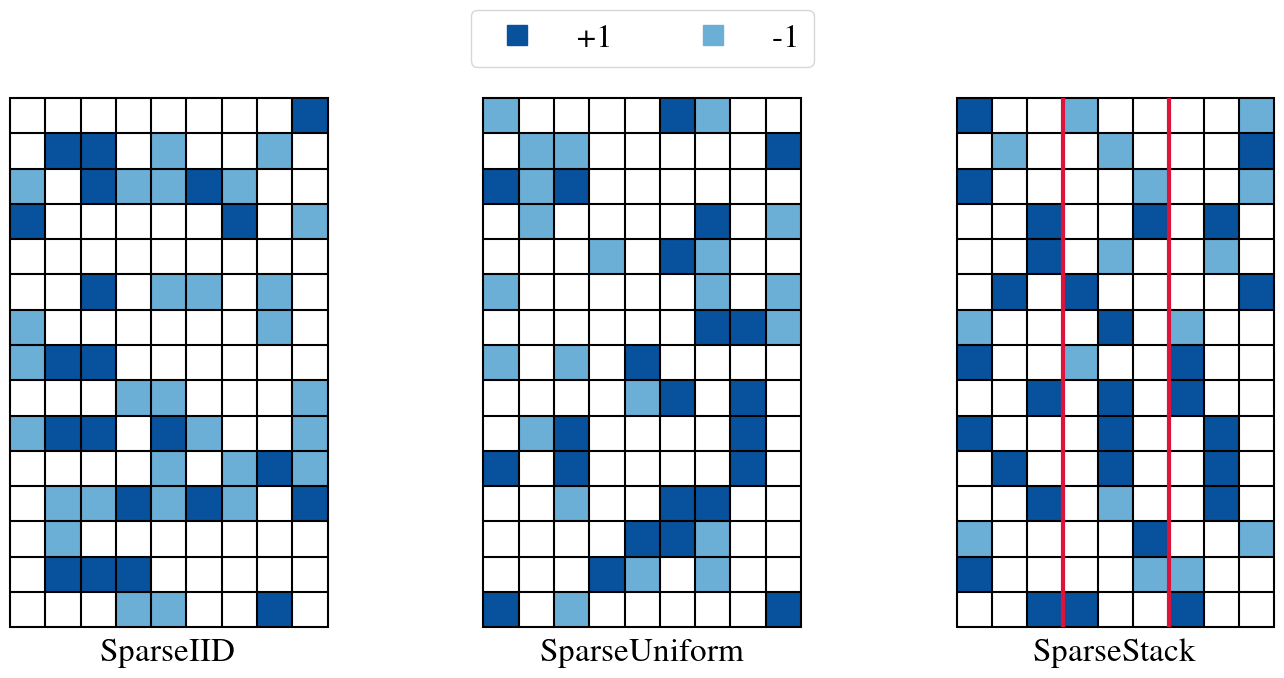

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"   
nRows = 15
nCols = 9
zeta  = 3

# block starts
subrow_block_sizes  = [(nRows + i) // zeta for i in range(zeta)]
subrow_block_starts = [sum(subrow_block_sizes[:i]) for i in range(zeta)]
subcol_block_sizes  = [(nCols + i) // zeta for i in range(zeta)]
subcol_block_starts = [sum(subcol_block_sizes[:i]) for i in range(zeta)]

# sparsity matrices
def column_sparsity():
    M = np.zeros((nRows, nCols), int)
    for j in range(nCols):
        rows = np.random.choice(nRows, zeta, replace=False)
        M[rows, j] = np.random.choice([-1, 1], size=zeta)
    return M

def row_sparsity():
    M = np.zeros((nRows, nCols), int)
    for i in range(nRows):
        cols = np.random.choice(nCols, zeta, replace=False)
        M[i, cols] = np.random.choice([-1, 1], size=zeta)
    return M

def iid_sparsity():
    keep = np.random.rand(nRows, nCols) < 0.35 #<-------- arbitrarily chosen 
    signs = np.random.choice([-1, 1], size=(nRows, nCols))
    return (keep * signs).astype(int)

def subcolumn_sparsity():
    M = np.zeros((nRows, nCols), int)
    for j in range(nCols):
        for start, size in zip(subrow_block_starts, subrow_block_sizes):
            row = np.random.choice(np.arange(start, start + size))
            M[row, j] = np.random.choice([-1, 1])
    return M

def subrow_sparsity():
    M = np.zeros((nRows, nCols), int)
    for i in range(nRows):
        for start, size in zip(subcol_block_starts, subcol_block_sizes):
            col = np.random.choice(np.arange(start, start + size))
            M[i, col] = np.random.choice([-1, 1])
    return M

matrices = [
    iid_sparsity(),
    row_sparsity(),
    # subcolumn_sparsity(),
    subrow_sparsity()
]
titles = [
    'SparseIID',
    'SparseUniform',
    'SparseStack'
]

color_pos, color_neg = '#08519c', '#6baed6'
black, red = 'black', 'crimson'

lw = 1.5      # grid line width
red_lw = 3  # red partition width

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for ax, M, title in zip(axs, matrices, titles):
    ax.set_xlim(0, nCols)
    ax.set_ylim(0, nRows)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    # hide default spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    for (i, j), v in np.ndenumerate(M):
        if v != 0:
            c = color_pos if v == 1 else color_neg
            ax.add_patch(patches.Rectangle(
                (j, nRows - i - 1), 1, 1,
                facecolor=c, edgecolor='none', zorder=0))

    # interior grid lines
    for x in range(1, nCols):
        ax.plot([x, x], [0, nRows], color=black,
                linewidth=lw, zorder=1)
    for y in range(1, nRows):
        ax.plot([0, nCols], [y, y], color=black,
                linewidth=lw, zorder=1)

    ax.add_patch(patches.Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes,
        fill=False,
        edgecolor=red if 'Sub' in title else black,
        linewidth=red_lw if 'Sub' in title else lw,
        clip_on=False, zorder=2
    ))

    if title == 'Sub-Column Sparsity':
        for start in subrow_block_starts[1:]:
            y = nRows - start
            ax.plot([0, nCols], [y, y],
                    color=red, linewidth=red_lw, zorder=3)
    elif title == 'SparseStack':
        for start in subcol_block_starts[1:]:
            x = start
            ax.plot([x, x], [0, nRows],
                    color=red, linewidth=red_lw, zorder=3)

    ax.set_xlabel(title, fontsize=24, labelpad=8)

import matplotlib.lines as mlines
blue_patch  = mlines.Line2D([], [], color=color_pos, marker='s',
                            linestyle='None', markersize=14, label='+1')
light_patch = mlines.Line2D([], [], color=color_neg, marker='s',
                            linestyle='None', markersize=14, label='-1')
fig.legend([blue_patch, light_patch],
           ['+1', '-1'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.15),
           ncol=2,
           fontsize=24)

plt.tight_layout()
plt.savefig("fig4.png", dpi=300, bbox_inches="tight")
plt.show()
